In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/home/codyblakeney/private/personal_repo/gc_project/data/server_usage.csv")

In [3]:
df.head()

,timestamp,machineID,util_CPU,util_memory,util_disk,load1,load5,load15
0,41700,237,23.38,30.080000,42.200001,15.82,13.860000,12.64
1,39600,265,26.36,29.540000,57.599998,17.46,18.900000,16.70
2,42600,770,49.14,60.099999,41.860001,33.20,31.220000,30.52
3,40800,776,33.24,47.520000,43.599998,21.84,22.100000,24.02
4,42900,393,45.72,58.720000,42.000000,34.10,36.239999,36.92


In [4]:
first = np.sort(df.timestamp)[0]
last = np.sort(df.timestamp)[-1]

In [5]:
print("first:", first, "last:", last)

first: 39600 last: 82500


In [27]:
max_servers = 0
min_servers = 1311
count_below = 0
for i in np.sort((list(set(df.timestamp)))):
    num = sum(df.timestamp == i)
    if num > max_servers:
        max_servers = num
    if num < min_servers:
        if num < 1310:
            count_below += 1
        min_servers = num
        

In [28]:
max_servers

1310

In [29]:
min_servers

976

In [ ]:
count_below

In [ ]:
sum(df.timestamp == 82200)

In [ ]:
(last - first) / len(set(df.timestamp))

In [ ]:
first - last

In [8]:
timestamps = np.sort((list(set(df.timestamp))))

In [23]:
cpu_utilization_sum = {}
for ts in timestamps:
    cpu_utilization_sum[ts] = sum(df[df.timestamp == ts].load5)

In [24]:
mem_utilization_sum = {}
for ts in timestamps:
    mem_utilization_sum[ts] = sum(df[df.timestamp == ts].util_memory)

In [25]:
disk_utilization_sum = {}
for ts in timestamps:
    disk_utilization_sum[ts] = sum(df[df.timestamp == ts].util_disk)

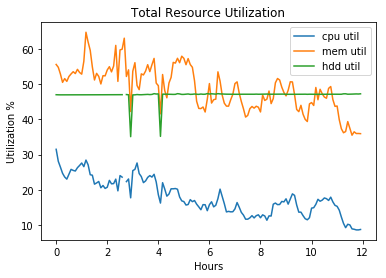

In [33]:
import matplotlib.pylab as plt

lists = sorted(cpu_utilization_sum.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
cpu = [z/1310 for z in y]
hour = [(z- timestamps[0])/3600  for z in x]

plt.plot(hour, cpu, label="cpu util")
lists = sorted(mem_utilization_sum.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
#minute = [z/300 for z in x]
mem = [z/1310 for z in y]

plt.plot(hour, mem, label="mem util")

lists = sorted(disk_utilization_sum.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
hdd = [z/1310 for z in y]
#minute = [z/300 for z in x]
plt.plot(hour, hdd, label="hdd util")
plt.legend()
plt.title("Total Resource Utilization")
plt.ylabel("Utilization %")
plt.xlabel("Hours")
plt.savefig("../figures/resource_utilization.png", dpi=300)
plt.show()